<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 640.0 kB/s eta 0:00:05
      --------------------------------------- 0.1/3.0 MB 648.1 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 744.7 kB/s eta 0:00:04
     - -------------------------------------- 0.1/3.0 MB 847.9 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 1.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.2 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.2 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.2 MB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.3 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/3.0 MB 1.5 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [57]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [93]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [94]:
import yfinance as yf

# Create a ticker object for Tesla
tsla_ticker = yf.Ticker("TSLA")

# Display the ticker object to confirm
print(tsla_ticker)


yfinance.Ticker object <TSLA>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [95]:
# Extract historical stock data for Tesla
tsla_stock_data = tsla_ticker.history(period="max")

# Display the first few rows of the data
print(tsla_stock_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [96]:
# Reset the index, but do not reindex dates
tsla_stock_data.reset_index(inplace=True)

# Convert the Date column to a simpler format
tsla_stock_data['Date'] = tsla_stock_data['Date'].dt.strftime('%Y-%m-%d')

# Display the first five rows of the data
print(tsla_stock_data.head())

         Date      Open      High       Low     Close     Volume  Dividends  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500        0.0   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500        0.0   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000        0.0   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000        0.0   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [97]:
import pandas as pd

# Assuming tsla_stock_data is your DataFrame containing Tesla stock data
# Convert 'Date' column to datetime format with the desired format
tsla_stock_data['Date'] = pd.to_datetime(tsla_stock_data['Date'], format='%Y-%m-%d')

# Now 'Date' column has been converted to datetime format with the desired format
# You can verify the change using dtypes attribute
print(tsla_stock_data.dtypes)

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [98]:
import requests

# URL of the webpage to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Display the first 500 characters of the html_data to confirm
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup`.


In [99]:
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Display the title of the webpage to confirm parsing
print(soup.title)

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>


In [100]:
# Find all tables in the HTML
tables = soup.find_all('table')

# Display the number of tables found and the first few rows of each table for inspection
print(f"Found {len(tables)} tables on the page.")

for i, table in enumerate(tables):
    print(f"\nTable {i + 1} content:")
    headers = [header.text.strip() for header in table.find_all('th')]
    rows = []
    for row in table.find_all('tr'):
        columns = row.find_all('td')
        rows.append([column.text.strip() for column in columns])
    
    # Display the headers and a few rows
    print(f"Headers: {headers}")
    for row in rows[:5]:  # Display first 5 rows for brevity
        print(row)

Found 6 tables on the page.

Table 1 content:
Headers: ['Tesla Annual Revenue(Millions of US $)']
[]
['2021', '$53,823']
['2020', '$31,536']
['2019', '$24,578']
['2018', '$21,461']

Table 2 content:
Headers: ['Tesla Quarterly Revenue(Millions of US $)']
[]
['2022-09-30', '$21,454']
['2022-06-30', '$16,934']
['2022-03-31', '$18,756']
['2021-12-31', '$17,719']

Table 3 content:
Headers: ['Sector', 'Industry', 'Market Cap', 'Revenue']
[]
['Auto/Tires/Trucks', 'Auto Manufacturers - Domestic', '$549.575B', '$53.823B']
["Tesla is the market leader in battery-powered electric car sales in the United States, with roughly 70% market share. The company's flagship Model 3 is the best-selling EV model in the United States. Tesla, which has managed to garner the reputation of a gold standard over the years, is now a far bigger entity that what it started off since its IPO in 2010, with its market cap crossing $1 trillion for the first time in October 2021.? The EV king's market capitalization is mo

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [101]:
# Assume the table of interest is the second table (index 1)
table = tables[1]

# Extract the table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    rows.append([column.text.strip() for column in columns])

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])

# Remove rows where 'Revenue' is an empty string
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']

# Clean the 'Revenue' column to convert it to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame
print(tesla_revenue)


          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


Execute the following lines to remove an null or empty strings in the Revenue column.


In [102]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [118]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [106]:
import yfinance as yf

# Create a ticker object for Tesla
gme_ticker = yf.Ticker("GME")

# Display the ticker object to confirm
print(gme_ticker)


yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [107]:
# Extract historical stock data for Tesla
gme_stock_data = gme_ticker.history(period="max")

# Display the first few rows of the data
print(gme_stock_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [108]:
# Reset the index, but do not reindex dates
gme_stock_data.reset_index(inplace=True)

# Convert the Date column to a simpler format
gme_stock_data['Date'] = gme_stock_data['Date'].dt.strftime('%Y-%m-%d')

# Display the first five rows of the data
print(gme_stock_data.head())

         Date      Open      High       Low     Close    Volume  Dividends  \
0  2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1  2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2  2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3  2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4  2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [109]:
import requests

# URL of the webpage to be scraped
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Sending a GET request to the URL
response = requests.get(url)

# Checking if the request was successful (status code 200)
if response.status_code == 200:
    # Extracting the HTML content
    html_data = response.text
    print("HTML data downloaded successfully.")
else:
    print("Failed to download HTML data. Status code:", response.status_code)


HTML data downloaded successfully.


Parse the html data using `beautiful_soup`.


In [110]:
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Display the title of the webpage to confirm parsing
print(soup.title)

<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


In [111]:
# Find all tables in the HTML
tables = soup.find_all('table')

# Display the number of tables found and the first few rows of each table for inspection
print(f"Found {len(tables)} tables on the page.")

for i, table in enumerate(tables):
    print(f"\nTable {i + 1} content:")
    headers = [header.text.strip() for header in table.find_all('th')]
    rows = []
    for row in table.find_all('tr'):
        columns = row.find_all('td')
        rows.append([column.text.strip() for column in columns])
    
    # Display the headers and a few rows
    print(f"Headers: {headers}")
    for row in rows[:5]:  # Display first 5 rows for brevity
        print(row)

Found 6 tables on the page.

Table 1 content:
Headers: ['GameStop Annual Revenue(Millions of US $)']
[]
['2020', '$6,466']
['2019', '$8,285']
['2018', '$8,547']
['2017', '$7,965']

Table 2 content:
Headers: ['GameStop Quarterly Revenue(Millions of US $)']
[]
['2020-04-30', '$1,021']
['2020-01-31', '$2,194']
['2019-10-31', '$1,439']
['2019-07-31', '$1,286']

Table 3 content:
Headers: ['Sector', 'Industry', 'Market Cap', 'Revenue']
[]
['Retail/Wholesale', 'Retail - Consumer Electronics', '$0.293B', '$6.466B']
["GameStop Corp. is the world's largest video game and entertainment software retailer. The company operates 4,816 retail stores across the United States and in fifteen countries worldwide. The company also operates two e-commerce sites, GameStop.com and EBgames.com, and publishes Game Informer? magazine, a leading multi-platform video game publication. GameStop Corp. sells new and used video game software, hardware and accessories for next generation video game systems from Sony, N

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [112]:
# Assume the table of interest is the second table (index 1)
table = tables[1]

# Extract the table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    rows.append([column.text.strip() for column in columns])

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])

# Clean the 'Revenue' column to remove commas and dollar signs, and convert it to float
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame
print(gme_revenue)

          Date  Revenue
0   2020-04-30   1021.0
1   2020-01-31   2194.0
2   2019-10-31   1439.0
3   2019-07-31   1286.0
4   2019-04-30   1548.0
..         ...      ...
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [83]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


In [115]:
import pandas as pd

# Assuming gme_revenue is your DataFrame containing GameStop revenue data
# and gme_stock_data is your DataFrame containing GameStop stock data

# Convert 'Date' column to datetime format with the desired format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], format='%Y-%m-%d')

# Convert 'Date' column to datetime format with the desired format
gme_stock_data['Date'] = pd.to_datetime(gme_stock_data['Date'], format='%Y-%m-%d')

# Now 'Date' column in both DataFrames has been converted to datetime format with the desired format
# You can verify the change using dtypes attribute
print("Data types of gme_revenue DataFrame after conversion:")
print(gme_revenue.dtypes)

print("\nData types of gme_stock_data DataFrame after conversion:")
print(gme_stock_data.dtypes)



Data types of gme_revenue DataFrame after conversion:
Date       datetime64[ns]
Revenue           float64
dtype: object

Data types of gme_stock_data DataFrame after conversion:
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



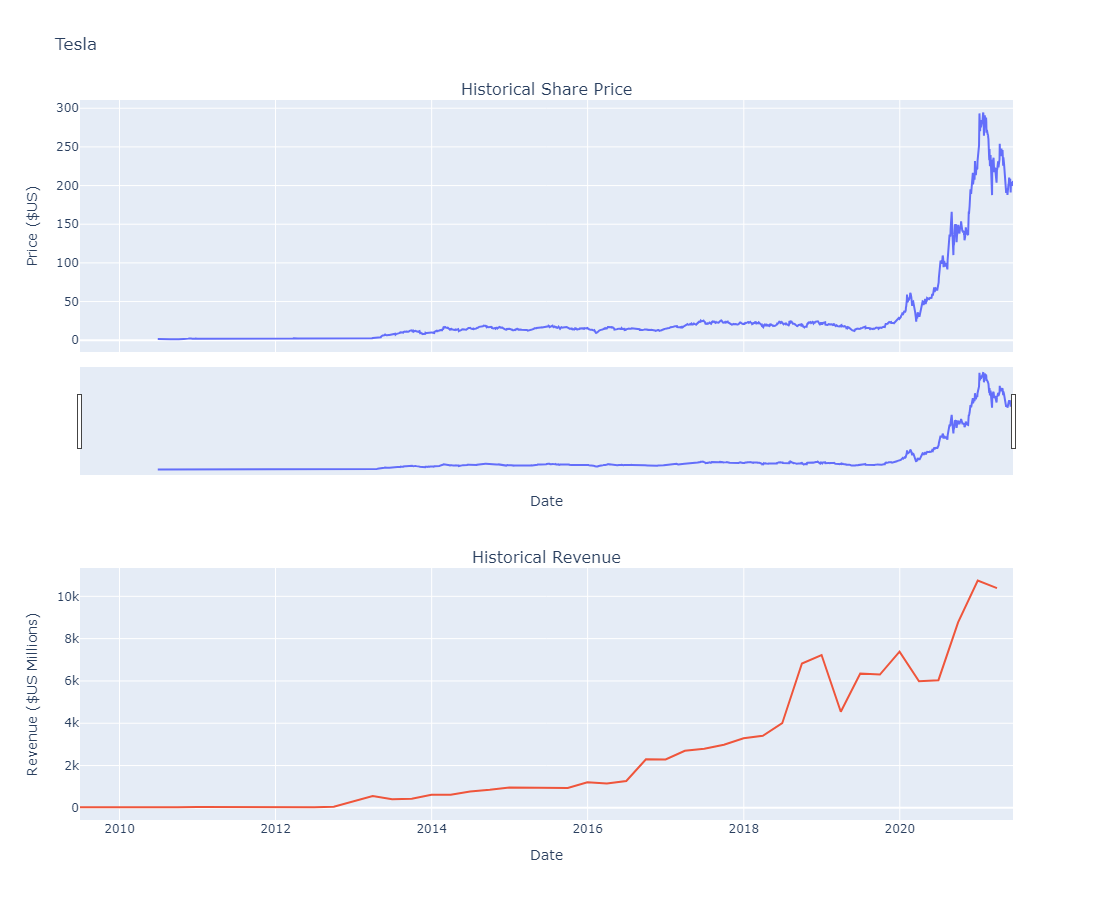

In [116]:
make_graph(tsla_stock_data, tesla_revenue, "Tesla")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



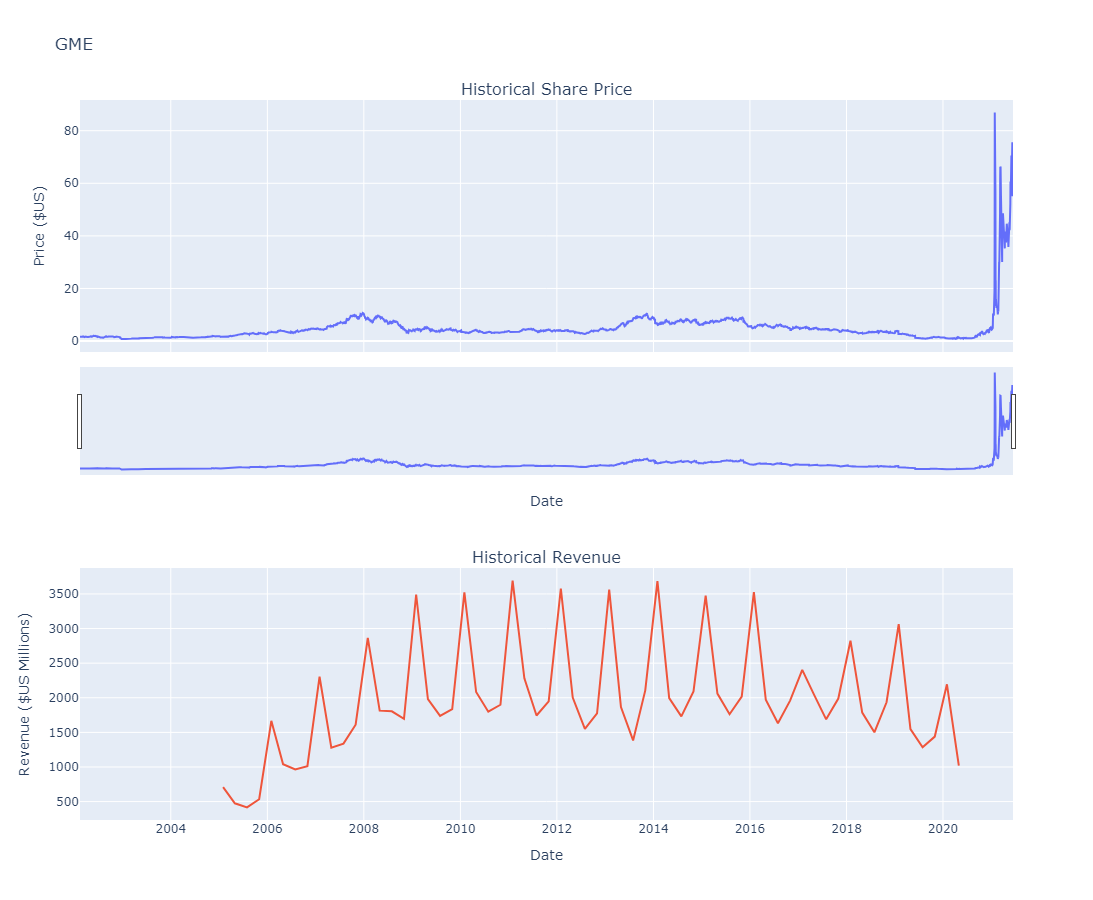

In [117]:
make_graph(gme_stock_data, gme_revenue, "GME")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
